In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [40]:
df=pd.read_csv(r'C:\Users\Rishabh\Downloads\startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/04/2020,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,NaN
1,2,06/04/2020,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series 1,43000000,NaN
2,3,08/04/2020,Zupee,Gaming,Gaming,Gurugram,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,NaN
3,4,07/04/2020,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,NaN
4,5,15/04/2020,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3077 non-null   int64 
 1   Date dd/mm/yyyy    3077 non-null   object
 2   Startup Name       3077 non-null   object
 3   Industry Vertical  2906 non-null   object
 4   SubVertical        2141 non-null   object
 5   City  Location     2897 non-null   object
 6   Investors Name     3053 non-null   object
 7   InvestmentnType    3073 non-null   object
 8   Amount in USD      2110 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 240.5+ KB


In [42]:
df.isnull().sum().sort_values(ascending=False) * 100/len(df)

Remarks              86.382840
Amount in USD        31.426714
SubVertical          30.419240
City  Location        5.849854
Industry Vertical     5.557361
Investors Name        0.779981
InvestmentnType       0.129997
Startup Name          0.000000
Date dd/mm/yyyy       0.000000
Sr No                 0.000000
dtype: float64

In [43]:
del df['Remarks']

In [44]:
df['na_val']= df.isnull().sum(axis=1)
df= df.rename(columns={"Date dd/mm/yyyy": "date","Sr No": "sr_no", "Startup Name": "name", "Industry Vertical": "vertical", "SubVertical": "subvertical", "City  Location": "city", "Investors Name": "investor", "InvestmentnType": "round", "Amount in USD": "amount"}).set_index('sr_no')
df

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
1,09/04/2020,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,0
2,06/04/2020,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series 1,43000000,0
3,08/04/2020,Zupee,Gaming,Gaming,Gurugram,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,0
4,07/04/2020,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,0
5,15/04/2020,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,0
...,...,...,...,...,...,...,...,...,...
3073,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",3
3074,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",3
3075,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",3


In [45]:
int_ln= df.shape[0]
df.drop(df.loc[df['na_val']>3].index, inplace= True)
(int_ln-df.shape[0])*100/int_ln

1.2999675008124796

In [46]:
print(df.na_val.sum())
df.isnull().sum()


2122


date             0
name             0
vertical       131
subvertical    896
city           140
investor        24
round            4
amount         927
na_val           0
dtype: int64

In [47]:
df[['name', 'vertical', 'subvertical', 'amount']]=df[['name', 'vertical', 'subvertical', 'amount']].replace(to_replace =',', value = '', regex = True)
df.replace(to_replace ='\+', value = '', regex = True, inplace= True)
df.replace(to_replace =r'\\\\xc2\\\\xa0', value = '', regex = True, inplace= True)
df.replace(to_replace =r'\\\\Xc2\\\\Xa0', value = '', regex = True, inplace= True)
df.replace(to_replace ='N/A', value = np.nan, regex = True, inplace= True)
df.replace(to_replace ='.com$', value = '', regex = True, inplace= True)
df.replace(to_replace ='Bangalore', value = 'Bengaluru', regex = True, inplace= True)
df.head(11)

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
1,09/04/2020,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,0
2,06/04/2020,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Tencent, Ark Impact, Korea Investment Partners...",Series 1,43000000,0
3,08/04/2020,Zupee,Gaming,Gaming,Gurugram,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,0
4,07/04/2020,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,0
5,15/04/2020,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,0
6,08/04/2020,Fingerlix,Food Delivery,Ready-to-Cook Food,Mumbai,"Accel, Zephyr Peacock, Swiggy, and RB Investments",Series C,1800000,0
7,31/03/2020,Nykaa,E-commerce,Cosmetic and Beauty Products,Mumbai,Steadview Capital,Series F,13000000,0
8,02/04/2020,Recko,Digital Reconcilation and Financial Services,AI-powered Reconciliation of Digital Transactions,Bengaluru,Vertex Ventures Southeast Asia and India and P...,Series A,6000000,0
9,04/03/2020,Soxytoes,E-commerce,Socks,Noida,Angel Networks,Angel,NaN,1


In [48]:
df.loc[df['amount']=='undisclosed']=np.nan
df.loc[df['amount']=='unknown']=np.nan
df.loc[df['amount']=='Undisclosed']=np.nan
df.loc[df['amount']=='Unknown']=np.nan

amt= df[df.amount.notnull()]
amt.amount= amt.amount.astype('float')


nm_am= amt.copy()[['name','amount']]

nm_am= nm_am.groupby('name').sum().sort_values('amount', ascending= False)
nm_am

,amount
name,
Flipkart,4.759700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.148950e+09
Ola Cabs,2.054200e+09
Udaan,8.700000e+08
...,...
Hostel Dunia,1.600000e+04
Play your sport,1.600000e+04
Enabli,1.600000e+04


In [49]:
from numpy import datetime64
df['date']= pd.to_datetime(df['date'], dayfirst=True) 
df.sort_values(by= 'date', ascending= False).head()


,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
5,2020-04-15,BigBasket,E-commerce,Online Grocery Delivery,Bengaluru,Alibaba Group,Debt Financing,50000000,0.0
1,2020-04-09,Vedantu,EduTech,Online Tutoring,Bengaluru,Legend Capital,Series C1,12560000,0.0
6,2020-04-08,Fingerlix,Food Delivery,Ready-to-Cook Food,Mumbai,"Accel, Zephyr Peacock, Swiggy, and RB Investments",Series C,1800000,0.0
3,2020-04-08,Zupee,Gaming,Gaming,Gurugram,"Matrix Partners India, Falcon Edge Capital, We...",Series A,8000000,0.0
4,2020-04-07,DeHaat,AgriTech,AgriTech,Patna,"Sequoia Capital India, FMO, Omnivore and AgFu...",Series A,12000000,0.0


In [50]:
# df.rename(columns={"Date dd/mm/yyyy": "date","Sr No": "sr_no", "Startup Name": "name", "Industry Vertical": "vertical", "SubVertical": "subvertical", "City  Location": "city", "Investors Name": "investor", "InvestmentnType": "round", "Amount in USD": "amount"}, inplace= True)
df['vertical']= df['vertical'].replace(to_replace ='-', value = '', regex = True)
for col in df.columns[1:5]:
    df[col]= df[col].str.title()
df['vertical'].replace(to_replace ='Edtech', value = 'Education', inplace= True)
df['vertical'].replace(to_replace ='Edutech', value = 'Education', inplace= True)
df.loc[df.vertical.str.contains('Food|Dining|Restaurant', regex=True, na=False), 'vertical']= 'Food'
df.loc[df.vertical.str.contains('Education|Exam', regex=True, na=False), 'vertical']= 'Education'
df.loc[df.vertical.str.contains('commerce|Marketplace', regex=True, na=False), 'vertical']= 'Ecommerce'
df.loc[df.vertical.str.contains('Health|Doctor', regex=True, na=False), 'vertical']= 'Healthcare'
df.loc[df.vertical.str.contains('Fin', regex=True, na=False), 'vertical']= 'Finance'
df.loc[df.vertical.str.contains('Hotel|Resort', regex=True, na=False), 'vertical']= 'Hospitality'
df.loc[df.vertical.str.contains('Transport', regex=True, na=False), 'vertical']= 'Transportation'
df.loc[df.vertical.str.contains('Logistics', regex=True, na=False), 'vertical']= 'Logistics'
df.loc[df.vertical.str.contains('Delivery', regex=True, na=False), 'vertical']= 'Delivery'
df.loc[df.vertical.str.contains('Hiring|Job', regex=True, na=False), 'vertical']= 'Job Platform'
df.loc[df.vertical.str.contains('Rent', regex=False, na=False), 'vertical']= 'Rental Services'
df.loc[df.vertical.str.contains('Analytics', regex=True, na=False), 'vertical']= 'Analytics Platform'
df.loc[df.vertical.str.contains('It', regex=True, na=False), 'vertical']= 'Information Technology'
df.loc[df.vertical.str.contains('Gam', regex=True, na=False), 'vertical']= 'Gaming'
df.loc[df.vertical.str.contains('Hyperlocal', regex=True, na=False), 'vertical']= 'Hyperlocal Services'
df.loc[df.vertical.str.contains('Paym', regex=True, na=False)]#, 'vertical']= 'Job Platform'

# df


,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
2330,2015-10-03,Chillr,Mobile Payments App,NaN,Mumbai,Sequoia Capital,Private Equity,6000000,1.0
2376,2015-10-19,Citrus Payment,Payments Solution Platform,NaN,Mumbai,"Sequoia Capital, Ascent Capital, eContext Asia...",Private Equity,25000000,1.0
2396,2015-10-26,Razorpay,Online Payment Gateway,NaN,Jaipur,"Tiger Global Management, Matrix Partners",Private Equity,9000000,1.0
2417,2015-09-01,Fxmartindia,Payment Services Platform,NaN,Chandigarh,Flipkart,Private Equity,NaN,2.0
2540,2015-08-10,Tonetag,Mobile Payment Software Platform,NaN,Bengaluru,Reliance Capital Venture,Private Equity,1000000,1.0
2657,2015-07-17,Quikwallet,F&B Sector Mobile Payment Platform,NaN,Mumbai,Snow Leopard Technology Ventures,Private Equity,1600000,1.0
2660,2015-07-20,Innoviti,Payment Solutions Platform,NaN,Bengaluru,"Catamaran Ventures, New India Investment Corpo...",Private Equity,4850000,1.0
2666,2015-07-23,Mswipe,Mobile Point Of Sale Payment Solution,NaN,NaN,"Falcon Edge Capital, Meru Capital, Ola, Matrix...",Private Equity,25000000,2.0
2717,2015-06-03,Mypoolin,P2P Payments Platform,NaN,New Delhi,"Sharad Sharma, Rajan Anandan, Sunil Kalra, Ami...",Seed Funding,NaN,2.0


In [51]:
df['vertical'].replace(to_replace ='Edtech', value = 'Education', inplace= True)
df['vertical'].replace(to_replace ='Edutech', value = 'Education', inplace= True)
df.loc[df.vertical.str.contains('Food|Dining|Restaurant', regex=True, na=False), 'vertical']= 'Food'
df.loc[df.vertical.str.contains('Education|Exam', regex=True, na=False), 'vertical']= 'Education'
df.loc[df.vertical.str.contains('commerce|Marketplace', regex=True, na=False), 'vertical']= 'Ecommerce'
df.loc[df.vertical.str.contains('Health|Doctor', regex=True, na=False), 'vertical']= 'Healthcare'
df.loc[df.vertical.str.contains('Fin', regex=True, na=False), 'vertical']= 'Finance'
df.loc[df.vertical.str.contains('Hotel|Resort', regex=True, na=False), 'vertical']= 'Hospitality'
df.loc[df.vertical.str.contains('Transport', regex=True, na=False), 'vertical']= 'Transportation'
df.loc[df.vertical.str.contains('Logistics', regex=True, na=False), 'vertical']= 'Logistics'
df.loc[df.vertical.str.contains('Delivery', regex=True, na=False), 'vertical']= 'Delivery'
df.loc[df.vertical.str.contains('Hiring|Job', regex=True, na=False), 'vertical']= 'Job Platform'
df.loc[df.vertical.str.contains('Rent', regex=False, na=False), 'vertical']= 'Rental Services'
df.loc[df.vertical.str.contains('Analytics', regex=True, na=False), 'vertical']= 'Analytics Platform'
df.loc[df.vertical.str.contains('It', regex=True, na=False), 'vertical']= 'Information Technology'
df.loc[df.vertical.str.contains('Gam', regex=True, na=False), 'vertical']= 'Gaming'
df.loc[df.vertical.str.contains('Hyperlocal', regex=True, na=False), 'vertical']= 'Hyperlocal Services'
df.loc[df.vertical.str.contains('Paym', regex=True, na=False)]#, 'vertical']= 'Job Platform'


,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
2330,2015-10-03,Chillr,Mobile Payments App,NaN,Mumbai,Sequoia Capital,Private Equity,6000000,1.0
2376,2015-10-19,Citrus Payment,Payments Solution Platform,NaN,Mumbai,"Sequoia Capital, Ascent Capital, eContext Asia...",Private Equity,25000000,1.0
2396,2015-10-26,Razorpay,Online Payment Gateway,NaN,Jaipur,"Tiger Global Management, Matrix Partners",Private Equity,9000000,1.0
2417,2015-09-01,Fxmartindia,Payment Services Platform,NaN,Chandigarh,Flipkart,Private Equity,NaN,2.0
2540,2015-08-10,Tonetag,Mobile Payment Software Platform,NaN,Bengaluru,Reliance Capital Venture,Private Equity,1000000,1.0
2657,2015-07-17,Quikwallet,F&B Sector Mobile Payment Platform,NaN,Mumbai,Snow Leopard Technology Ventures,Private Equity,1600000,1.0
2660,2015-07-20,Innoviti,Payment Solutions Platform,NaN,Bengaluru,"Catamaran Ventures, New India Investment Corpo...",Private Equity,4850000,1.0
2666,2015-07-23,Mswipe,Mobile Point Of Sale Payment Solution,NaN,NaN,"Falcon Edge Capital, Meru Capital, Ola, Matrix...",Private Equity,25000000,2.0
2717,2015-06-03,Mypoolin,P2P Payments Platform,NaN,New Delhi,"Sharad Sharma, Rajan Anandan, Sunil Kalra, Ami...",Seed Funding,NaN,2.0


In [52]:
df.loc[df['round'].str.contains('Angel', regex=True, na=False), 'round']= 'Angel Funding'
df.loc[df['round'].str.contains('Crowd', regex=True, na=False), 'round']= 'Crowd Funding'
df.loc[df['round'].str.contains('Debt', regex=True, na=False), 'round']= 'Debt Funding'
df.loc[df['round'].str.contains('Private', regex=True, na=False), 'round']= 'Private Funding'
df.loc[df['round'].str.contains('Series|series', regex=True, na=False), 'round']= 'Series Funding'
df.loc[df['round'].str.contains('Seed', regex=True, na=False), 'round']= 'Seed Funding'
df.loc[df['round'].str.contains('Equity', regex=True, na=False), 'round']= 'Equity Based Funding'
df.loc[df['round'].str.contains('Series', regex=True, na=False), 'round']= 'Series Funding'
df.loc[df['round'].str.contains('Series', regex=True, na=False), 'round']= 'Series Funding'


In [53]:
list(df['investor'])
from wordcloud import WordCloud

names = df["investor"][~pd.isnull(df["investor"])]
# print(names)
# wordcloud = WordCloud().generate(' '.join(names))
# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud)
# plt.title("Wordcloud for Investor Names", fontsize=30)
# plt.axis("off")
# plt.show()
invnames= ', '.join(names).strip('and')
invnames=invnames.strip()

In [54]:
invn= invnames.split(',')
print(len(invn))
len(set(invn))
# set(invn)

5775


3256

Undisclosed Investors       104
Indian Angel Network         25
Ratan Tata                   23
Group Of Angel Investors     19
Kalaari Capital              16
Sequoia Capital              14
Accel Partners               13
Saif Partners                12
Venture Catalysts            11
Brand Capital                11
Name: investor, dtype: int64


Text(0.5, 1.0, 'Investors Names with number of funding')

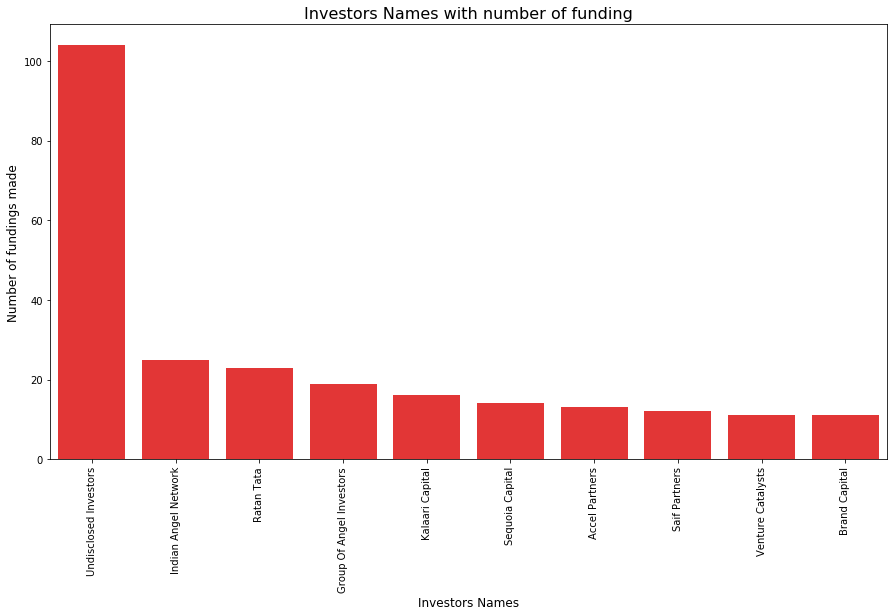

In [55]:
# investor = df.groupby('investor')['amount'].sum().reset_index()
# investor.sort_values('amount', inplace=True, ascending=False)
# investor.reset_index()[:10]
df['investor']=df['investor'].str.title()
df.loc[df['investor']== 'Undisclosed Investor', 'investor']= 'Undisclosed Investors'

investors = df['investor'].dropna().value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)


Undisclosed Investors       104
Indian Angel Network         25
Ratan Tata                   23
Group Of Angel Investors     19
Kalaari Capital              16
Sequoia Capital              14
Accel Partners               13
Saif Partners                12
Venture Catalysts            11
Brand Capital                11
Name: investor, dtype: int64


Text(0.5, 1.0, 'Investors Names with number of funding')

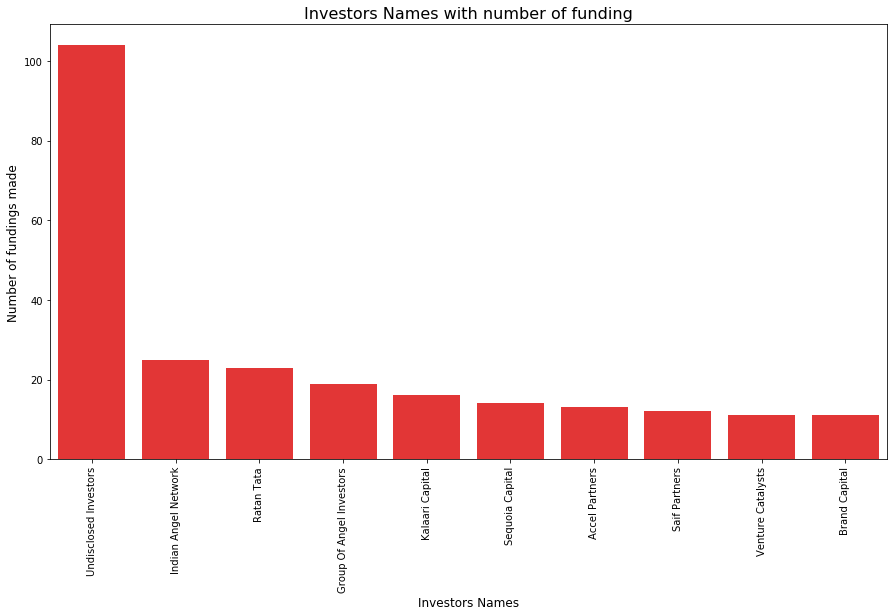

In [56]:
investors = df['investor'].dropna().value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)


In [57]:
df['name'].nunique()

2311

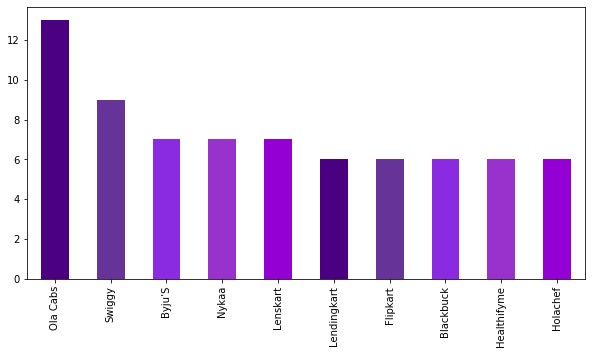

In [58]:
clrs= ['indigo','rebeccapurple', 'blueviolet', 'darkorchid', 'darkviolet']
df['name'].value_counts()[:10].plot.bar(figsize=(10,5), color= clrs)
plt.show()


In [59]:
df.shape

(3037, 9)

# City wise distribution

In [60]:
a=pd.get_dummies(df['city']).sum().sort_values(ascending= False)
a

Bengaluru              850
Mumbai                 574
New Delhi              428
Gurgaon                288
Pune                   108
                      ... 
New Delhi/ Houston       1
New York                 1
New York, Bengaluru      1
New York/ India          1
Kolkatta                 1
Length: 108, dtype: int64

In [61]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    y=a.index,
    x=a,
    name='City Wise Distribution',
                orientation='h'))

fig.show()

# Industry wise distribution

In [62]:
a=pd.get_dummies(df['vertical']).sum().sort_values(ascending= False)
a= pd.DataFrame(a).reset_index().rename(columns= {'index': 'industry', 0:'count'})
a.loc[a.industry.str.contains('Food', regex=False), 'industry']= 'Food'
a.loc[a['count'] < 3, 'industry']='Misc'

In [63]:
fig = go.Figure(data=[go.Pie(labels=a.industry, values=a['count'])])
fig.show()

In [64]:
a=pd.get_dummies(df['round']).sum().sort_values(ascending= False)
a= pd.DataFrame(a).reset_index().rename(columns= {'index': 'type', 0:'count'})
# a.loc[a['indus'.str.contains('Food', regex=False), 'industry']= 'Food'
a.loc[a['count'] < 10, 'type']='Others'
fig = go.Figure(data=[go.Pie(labels=a.type, values=a['count'])])
fig.show()
# df['round'].value_counts().plot(kind='pie', legend= True)


In [65]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    y=a['industry'][:15],
    x=a['count'][:15],
    name='Sector Wise Distribution',
                orientation='h'))

fig.show()

AttributeError: 'DataFrame' object has no attribute 'industry'

In [ ]:
df.sort_values(by= 'amount').head(15)

In [66]:
df.loc[df['name'] == 'Flipkart']

,date,name,vertical,subvertical,city,investor,round,amount,na_val
sr_no,,,,,,,,,
685,2017-08-11,Flipkart,Ecommerce,Online Marketplace,Bengaluru,Softbank,Private Funding,2500000000,0.0
807,2017-06-26,Flipkart,Ecommerce,Online Marketplace,Bengaluru,Naspers,Private Funding,71000000,0.0
1000,2017-03-21,Flipkart,Ecommerce,Ecommerce Marketplace,Bengaluru,"Microsoft, Ebay, Tencent Holdings",Private Funding,1400000000,0.0
1066,2017-02-20,Flipkart,Ecommerce,Online Marketplace,Bengaluru,"Bennett, Coleman And Co. Ltd (Bccl)",Private Funding,38700000,0.0
2682,2015-07-28,Flipkart,Ecommerce,NaN,Bengaluru,Steadview Capital And Existing Investors,Private Funding,700000000,1.0
2723,2015-06-04,Flipkart,Ecommerce,NaN,Bengaluru,Morgan Stanley,Private Funding,50000000,1.0


In [ ]:
df.loc[df['name'] == 'Ola Cabs']

In [ ]:
df.loc[df['name'] == 'Ola Cabs'].amount.sum()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=amt.name,
    x=amt.amount,
    name='Distribution',
                orientation='h',
    mode= 'markers'
))

fig.show()

# Amount vs industry

In [ ]:
amt_ver=df.copy()[['vertical', 'amount']].groupby('vertical').sum().sort_values('amount', ascending= False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=amt_ver.index[:15],
    x=amt_ver.amount[:15],
    name='Sector Wise Distribution',
                orientation='h'))

fig.show()

#                                                   Date

In [ ]:
inv_y=df.groupby(df['date'].dt.year)
inv_y.amount.sum().plot.bar()

In [ ]:
inv_20= df.loc[df['date'].dt.year == 2020]
inv_20.amount.sum()

In [ ]:
inv_20_m=inv_20.groupby(inv_20['date'].dt.month)
sm=inv_20_m.amount.sum()
fig= go.Figure([go.Bar(y= sm, x=['Jan', 'Feb', 'Mar', 'Apr'])])
fig.show()

In [ ]:
inv_m=df.groupby(df['date'].dt.month)
sm=inv_m.amount.sum()
fig= go.Figure([go.Bar(y= sm, x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])])
fig.show()

In [ ]:
import plotly.express as px
inv_m=df.groupby(df['date'].dt.day)
sm=inv_m.amount.sum()
fig = px.bar(y=sm,x=sm.index)
fig.show()


In [ ]:
df.loc[df.investor.str.split(pat= ', ',expand=True)[9]]

In [ ]:
cit_ver=df.copy()[['vertical', 'city','amount']].groupby('vertical').sum().reset_index()#.sort_values('city', ascending= False)
# cit_ver.loc[cit_ver['city'] =='Pune']
cit_ver

In [ ]:
(set(df.city))

In [ ]:
df['city'].replace(to_replace =['Ahemdabad', 'Ahmedabad'], value = 'Ahemadabad', inplace= True)
df['city'].replace(to_replace =['Bhubneswar'], value = 'Bhubaneswar', inplace= True)
df['city'].replace(to_replace =['Usa/India','Us/India', 'Us'], value = 'Usa', inplace= True)
df['city'].replace(to_replace =['Kolkatta'], value = 'Kolkata', inplace= True)
df['city'].replace(to_replace =['Kormangala'], value = 'Bengaluru', inplace= True)
df['city'].replace(to_replace =['Andheri', 'Chembur'], value = 'Mumbai', inplace= True)
df['city'].replace(to_replace =['Boston', 'Burnsville', 'California', 'Menlo Park', 'Palo Alto', 'New York'], value = 'Usa', inplace= True)
df['city'].replace(to_replace =['Panaji'], value = 'Goa', inplace= True)

df.loc[df.city.str.contains('Bengaluru', regex=True, na=False), 'city']= 'Bengaluru'
df.loc[df.city.str.contains('Chennai', regex=True, na=False), 'city']= 'Chennai'
df.loc[df.city.str.contains('Delhi', regex=True, na=False), 'city']= 'Delhi'
df.loc[df.city.str.contains('Mumbai', regex=True, na=False), 'city']= 'Mumbai'
df.loc[df.city.str.contains('Pune', regex=True, na=False), 'city']= 'Pune'
df.loc[df.city.str.contains('Noida', regex=True, na=False), 'city']= 'Noida'
df.loc[df.city.str.contains('Gurgaon|Gurugram', regex=True, na=False), 'city']= 'Gurgaon'
df.loc[df.city.str.contains('Goa', regex=True, na=False), 'city']= 'Goa'
df.loc[df.city.str.contains('India', regex=True, na=False), 'city']= 'India'
df.loc[df.city.str.contains('Hyderabad', regex=True, na=False), 'city']= 'Hyderabad'
df.loc[df.city.str.contains('San', regex=True, na=False), 'city']= 'Usa'

